In [1]:
# Let's start with necessary imports  
from IPython import display
import math
from pprint import pprint
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

In [2]:
!pip install praw

     -------------------------------------- 191.0/191.0 kB 2.3 MB/s eta 0:00:00


In [3]:
import praw

reddit = praw.Reddit(client_id='-ykkrlffcKEawgHLePHDDw',
                     client_secret='HDRFGxYd0trAZ0l0Z6EUYuylTp-r3w',
                     user_agent='No_Ladder4585')

In [4]:
# Let's define a set for our headlines so we don't 
# get duplicates when running multiple times:
headlines = set()

In [5]:
# Now, we can iterate through the /r/politics subreddit using the API client:
# https://www.reddit.com/r/politics/
for submission in reddit.subreddit('politics').new(limit=None):
    headlines.add(submission.title)
    display.clear_output()
    print(len(headlines))

986


In [6]:
#headlines
list(headlines)[:5]

["Amazon argues that national labor board is unconstitutional, joining SpaceX and Trader Joe's",
 'Cori Bush trailing Democratic primary challenger by 22 points: Poll',
 'Democrat Suozzi wins special election to replace Santos in New York',
 'Trump misses Supreme Court deadline to fight civil immunity from Jan. 6 lawsuits',
 'Here’s how much Utah’s schools would lose in a new tax cut. If lawmakers approve another tax cut in 2024, it will mean the Legislature will have cut $640 million from funding for public education and social services in recent years.']

In [7]:
## for testing purpose 
import pandas as pd
posts = []
ml_subreddit = reddit.subreddit('MachineLearning')

for post in ml_subreddit.hot(limit=10):
    posts.append([post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, post.created])

posts = pd.DataFrame(posts,columns=['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created'])
print(posts)

                                               title  score       id  \
0                        [D] Simple Questions Thread      8  1aob7zi   
1  [R] In Search of Needles in a 10M Haystack: Re...     78  1autvwq   
2  For anyone who’s a tech lead, what is your act...     22  1auyt1n   
3     MoE - I'm a bit confused about 'Experts' [D]\n     37  1aurrxi   
4  [D] Will mathematicians have the upper hand in...      4  1av5gwy   
5                              [D] AI/ML Internships    154  1audi2u   
6  [D] A Visual Guide to Mamba and State Space Mo...     11  1aupbct   
7                   [R] Representation Orthogonality      2  1av2dyh   
8      [P] Lipschitz continuity and convex functions      5  1auv1pp   
9  [D] Seeking Guidance for axolotl config: Fine-...      2  1auzq5u   

         subreddit                                                url  \
0  MachineLearning  https://www.reddit.com/r/MachineLearning/comme...   
1  MachineLearning  https://www.reddit.com/r/MachineLearning/

In [8]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rajes\AppData\Roaming\nltk_data...


True

In [9]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

# creating a Sentiment Intensity Analyzer (SIA) object
sia = SIA()
results = []

# run a loop and find the polarity_scores for each headline
for line in headlines:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

pprint(results[:5], width=100)  #width restricts line width

[{'compound': -0.2263,
  'headline': 'Amazon argues that national labor board is unconstitutional, joining SpaceX and '
              "Trader Joe's",
  'neg': 0.17,
  'neu': 0.719,
  'pos': 0.111},
 {'compound': 0.128,
  'headline': 'Cori Bush trailing Democratic primary challenger by 22 points: Poll',
  'neg': 0.0,
  'neu': 0.857,
  'pos': 0.143},
 {'compound': 0.7506,
  'headline': 'Democrat Suozzi wins special election to replace Santos in New York',
  'neg': 0.0,
  'neu': 0.584,
  'pos': 0.416},
 {'compound': -0.128,
  'headline': 'Trump misses Supreme Court deadline to fight civil immunity from Jan. 6 lawsuits',
  'neg': 0.345,
  'neu': 0.452,
  'pos': 0.203},
 {'compound': -0.7906,
  'headline': 'Here’s how much Utah’s schools would lose in a new tax cut. If lawmakers approve '
              'another tax cut in 2024, it will mean the Legislature will have cut $640 million '
              'from funding for public education and social services in recent years.',
  'neg': 0.2,
  'ne

In [10]:
df = pd.DataFrame.from_records(results)
df.head()

,neg,neu,pos,compound,headline
0,0.170,0.719,0.111,-0.2263,Amazon argues that national labor board is unc...
1,0.000,0.857,0.143,0.1280,Cori Bush trailing Democratic primary challeng...
2,0.000,0.584,0.416,0.7506,Democrat Suozzi wins special election to repla...
3,0.345,0.452,0.203,-0.1280,Trump misses Supreme Court deadline to fight c...
4,0.200,0.800,0.000,-0.7906,Here’s how much Utah’s schools would lose in a...


In [11]:
# your code for finding posts with a compound value greater than 0.2 as positive 
# and less than -0.2 as negative.

df['label'] = 0

df.loc[df['compound'] > 0.2, 'label'] = 1

df.loc[df['compound'] < -0.2, 'label'] = -1

df.head()

,neg,neu,pos,compound,headline,label
0,0.170,0.719,0.111,-0.2263,Amazon argues that national labor board is unc...,-1
1,0.000,0.857,0.143,0.1280,Cori Bush trailing Democratic primary challeng...,0
2,0.000,0.584,0.416,0.7506,Democrat Suozzi wins special election to repla...,1
3,0.345,0.452,0.203,-0.1280,Trump misses Supreme Court deadline to fight c...,0
4,0.200,0.800,0.000,-0.7906,Here’s how much Utah’s schools would lose in a...,-1


In [12]:
# Dataset Info and Statistics
# Let's first take a peak at a few positive and negative headlines:
print("Positive headlines:\n")
pprint(list(df[df['label']==1].headline)[:5])

print("\nNegative headlines:\n")
pprint(list(df[df['label']== -1].headline)[:5])

Positive headlines:

['Democrat Suozzi wins special election to replace Santos in New York',
 'Trump May Endorse a Tom Petty Cover Artist to Co-Chair the RNC – The former '
 'president may move to help get Lara Trump, his daughter-in-law, elected '
 'co-chair of the Republican National Committee',
 'Democrats gain seat in U.S. House as Tom Suozzi wins election to replace '
 'George Santos',
 'Biden Must Win. But How Can He?',
 'GoFundMe launched to help pay Trump’s legal fees']

Negative headlines:

['Amazon argues that national labor board is unconstitutional, joining SpaceX '
 "and Trader Joe's",
 'Here’s how much Utah’s schools would lose in a new tax cut. If lawmakers '
 'approve another tax cut in 2024, it will mean the Legislature will have cut '
 '$640 million from funding for public education and social services in recent '
 'years.',
 'Trump Claims His Bizarre Haley-Pelosi Mix-Up Was Deliberate',
 'Privacy Advocates Alarmed as House Resumes Spying Powers Fight',
 'Navalny’s de

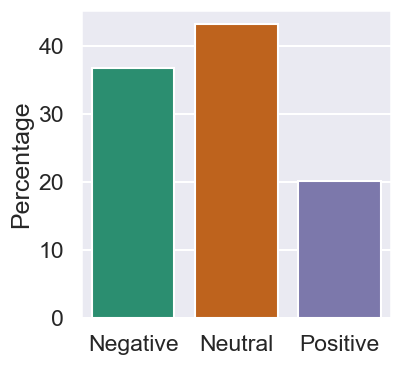

In [13]:
# let's plot a bar chart showing Positive, Neutral and Negative headlines :

fig, ax = plt.subplots(figsize=(4, 4))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()